# Extract

In [1]:
import pandas as pd

In [2]:
filename = '/kaggle/input/auto-prices-and-economic-trends-20192023/automobile_prices_economics_2019_2023.csv'
df = pd.read_csv(filename, dtype=str)
df

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,19-Jan,"25,000","18,000",1.60%,2.40%,"28,500"
1,19-Feb,"25,000","17,900",1.50%,2.40%,"29,000"
2,19-Mar,"25,000","17,800",1.90%,2.40%,"31,500"
3,19-Apr,"25,000","17,700",2.00%,2.40%,"30,000"
4,19-May,"25,000","17,600",1.80%,2.40%,"32,000"
...,...,...,...,...,...,...
56,23-Sep,"26,700","15,300",4.30%,5.25%,"72,000"
57,23-Oct,"26,800","15,400",4.00%,5.00%,"73,500"
58,23-Nov,"26,900","15,500",3.80%,4.75%,"74,000"
59,23-Dec,"27,000","15,600",3.50%,4.50%,"75,000"


In [3]:
df.dtypes

Month/Year            object
New Price ($)         object
Used Price ($)        object
Inflation Rate (%)    object
Interest Rate (%)     object
Units Sold            object
dtype: object

# Transform

In [4]:
sz = len(df)
def print_lines(filename):
    f = open(filename)
    for i in range(sz):
        line = f.readline()
        print('line: ', i + 1, line)
    f.close()

In [5]:
# print_lines(filename)

> ## Clean Data

In [6]:
df.isnull()

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
56,False,False,False,False,False,False
57,False,False,False,False,False,False
58,False,False,False,False,False,False
59,False,False,False,False,False,False


In [7]:
df.head()

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,19-Jan,"25,000","18,000",1.60%,2.40%,"28,500"
1,19-Feb,"25,000","17,900",1.50%,2.40%,"29,000"
2,19-Mar,"25,000","17,800",1.90%,2.40%,"31,500"
3,19-Apr,"25,000","17,700",2.00%,2.40%,"30,000"
4,19-May,"25,000","17,600",1.80%,2.40%,"32,000"


In [8]:
df.isnull().sum()


Month/Year            1
New Price ($)         1
Used Price ($)        1
Inflation Rate (%)    1
Interest Rate (%)     1
Units Sold            1
dtype: int64

In [9]:
#Remove one row - the 60th index containing all the null values 
#V10 - let's use fillna with the mean to input value instead of removing this row. 
# df.shape
# try:
#     df = df.drop(index=df.index[60])
#     print("size is now: ", df.shape)
# except:
#     print("This has already been removed")
#     print("size remains as: ", df.shape)

In [10]:
#Check that the null values are removed
df.isnull().sum()

Month/Year            1
New Price ($)         1
Used Price ($)        1
Inflation Rate (%)    1
Interest Rate (%)     1
Units Sold            1
dtype: int64

In [11]:
# df['Month/Year']
df.head()

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,19-Jan,"25,000","18,000",1.60%,2.40%,"28,500"
1,19-Feb,"25,000","17,900",1.50%,2.40%,"29,000"
2,19-Mar,"25,000","17,800",1.90%,2.40%,"31,500"
3,19-Apr,"25,000","17,700",2.00%,2.40%,"30,000"
4,19-May,"25,000","17,600",1.80%,2.40%,"32,000"


In [12]:
#Transform month/year columns into datatime
#Separate Month/Year as diff columns and into datetimes. The current format is in YEAR/MONTH. SO i have to change
# df['Month/Year'] = df['Month/Year'].transform
# df[['Year','Month']] = df['Month/Year'].str.split('-',expand=True)
# df['Year'] = df['Year'].apply(lambda x: '20' + x)
# df['Year/Month'] = df['Year'] + " " + df['Month']

df['Year/Month/Day'] = pd.to_datetime(df['Month/Year'], format='%y-%b')
df.drop('Month/Year', axis=1, inplace=True)

#Set date column as first position
first_column = df.pop('Year/Month/Day')
# df.drop('Year/Month',axis=1, inplace=True)
df.insert(0, 'Year/Month/Day', first_column)

df.head()
# df.dtypes

,Year/Month/Day,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,2019-01-01,"25,000","18,000",1.60%,2.40%,"28,500"
1,2019-02-01,"25,000","17,900",1.50%,2.40%,"29,000"
2,2019-03-01,"25,000","17,800",1.90%,2.40%,"31,500"
3,2019-04-01,"25,000","17,700",2.00%,2.40%,"30,000"
4,2019-05-01,"25,000","17,600",1.80%,2.40%,"32,000"


In [13]:
# try:
#     df.drop('Year/Month', axis=1, inplace=True)
#     df.drop('Month/Year', axis=1, inplace=True)
#     print("Completed")
# except:
#     print("This column has already been dropped")
# df.head()

In [14]:
# df['Month'] = df['Year/Month/Day']
# df['Month'] = df['Year/Month/Day'].dt.month
# df['Year'] = df['Year/Month/Day'].dt.year
# df.set_index('Year/Month/Day')



# df.drop('Year', axis=1, inplace=True)
# df.drop('Month', axis=1, inplace=True)


df.head()

,Year/Month/Day,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,2019-01-01,"25,000","18,000",1.60%,2.40%,"28,500"
1,2019-02-01,"25,000","17,900",1.50%,2.40%,"29,000"
2,2019-03-01,"25,000","17,800",1.90%,2.40%,"31,500"
3,2019-04-01,"25,000","17,700",2.00%,2.40%,"30,000"
4,2019-05-01,"25,000","17,600",1.80%,2.40%,"32,000"


In [15]:
#Correct the data types
#New Price & Used price remove commas and convert to numeric
#Inflation Rate & Interest rate convert to float
#Units sold remove comma and  convert to numeric 
try:
    df['New Price ($)'] = df['New Price ($)'].str.replace(',', '')
except:
    print("This has already been changed")


In [16]:
df['New Price ($)'] = pd.to_numeric(df['New Price ($)'])
df.head()

,Year/Month/Day,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,2019-01-01,25000.0,"18,000",1.60%,2.40%,"28,500"
1,2019-02-01,25000.0,"17,900",1.50%,2.40%,"29,000"
2,2019-03-01,25000.0,"17,800",1.90%,2.40%,"31,500"
3,2019-04-01,25000.0,"17,700",2.00%,2.40%,"30,000"
4,2019-05-01,25000.0,"17,600",1.80%,2.40%,"32,000"


In [17]:
df['Used Price ($)'] = pd.to_numeric(df['Used Price ($)'].str.replace(',',''))
df['Units Sold'] = pd.to_numeric(df['Units Sold'].str.replace(',',''))

In [18]:
df['Inflation Rate (%)'] = pd.to_numeric(df['Inflation Rate (%)'].str.replace('%',''))
df['Interest Rate (%)'] = pd.to_numeric(df['Interest Rate (%)'].str.replace('%',''))
df.head()

,Year/Month/Day,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,2019-01-01,25000.0,18000.0,1.6,2.4,28500.0
1,2019-02-01,25000.0,17900.0,1.5,2.4,29000.0
2,2019-03-01,25000.0,17800.0,1.9,2.4,31500.0
3,2019-04-01,25000.0,17700.0,2.0,2.4,30000.0
4,2019-05-01,25000.0,17600.0,1.8,2.4,32000.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year/Month/Day      60 non-null     datetime64[ns]
 1   New Price ($)       60 non-null     float64       
 2   Used Price ($)      60 non-null     float64       
 3   Inflation Rate (%)  60 non-null     float64       
 4   Interest Rate (%)   60 non-null     float64       
 5   Units Sold          60 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 3.0 KB


In [20]:
df.isnull().sum()

Year/Month/Day        1
New Price ($)         1
Used Price ($)        1
Inflation Rate (%)    1
Interest Rate (%)     1
Units Sold            1
dtype: int64

FILL empty rows/NaN with fillna using column mean
* All of the columns for the last row is NaN which means we apply the same thing to all of them

In [21]:
df['New Price ($)'] = df['New Price ($)'].fillna(df['New Price ($)'].mean())
df['Used Price ($)'] = df['Used Price ($)'].fillna(df['Used Price ($)'].mean())
df['Inflation Rate (%)'] = df['Inflation Rate (%)'].fillna(df['Inflation Rate (%)'].mean())
df['Interest Rate (%)'] = df['Interest Rate (%)'].fillna(df['Interest Rate (%)'].mean())
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].mean())

In [22]:
df['Year'] = df['Year/Month/Day'].dt.year
df['Month'] = df['Year/Month/Day'].dt.month



In [23]:
df.head()

,Year/Month/Day,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold,Year,Month
0,2019-01-01,25000.0,18000.0,1.6,2.4,28500.0,2019.0,1.0
1,2019-02-01,25000.0,17900.0,1.5,2.4,29000.0,2019.0,2.0
2,2019-03-01,25000.0,17800.0,1.9,2.4,31500.0,2019.0,3.0
3,2019-04-01,25000.0,17700.0,2.0,2.4,30000.0,2019.0,4.0
4,2019-05-01,25000.0,17600.0,1.8,2.4,32000.0,2019.0,5.0


This dataset contains monthly records of automobile prices (new and used), macroeconomic indicators (inflation and interest rates), and units sold from January 2019 to December 2023. It can be used to explore the impact of economic variables on vehicle pricing and demand.

Key Features:

60 monthly data points

Correlation-friendly layout for econometric or machine learning models

Useful for forecasting, trend analysis, and policy simulation

Relationships I can explore
- New vs Used Prices

- New Price vs Inflation Rate
- New Price vs Interest Rate

- Used price vs Inflation Rate

- Used price vs interest rate

- inflation rate vs interest rate/ year
- inflation rate vs units sold
- interest rate vs units sold

# Exploratory Data Analysis

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


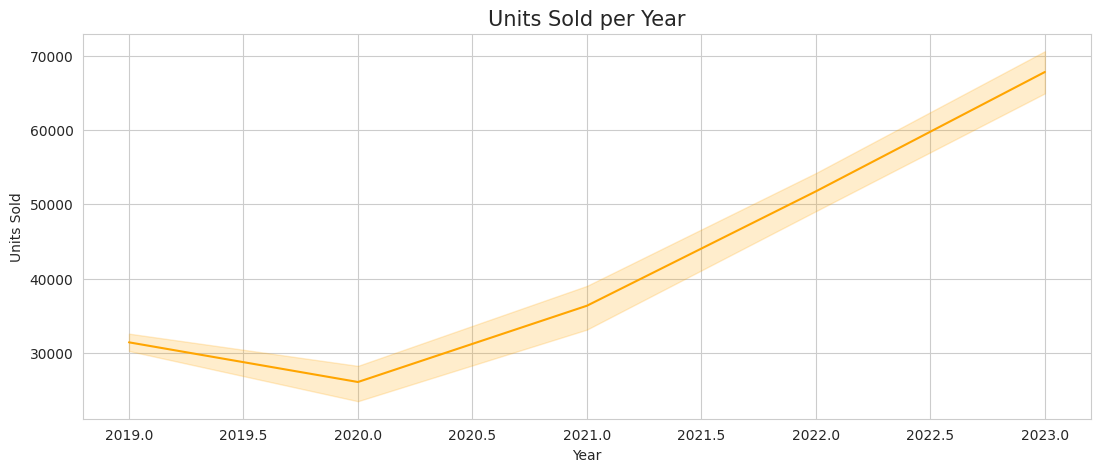

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(13,5))
plt.title("Units Sold per Year", fontsize=15)
sns.lineplot(x=df['Year'],y=df['Units Sold'], color='orange')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


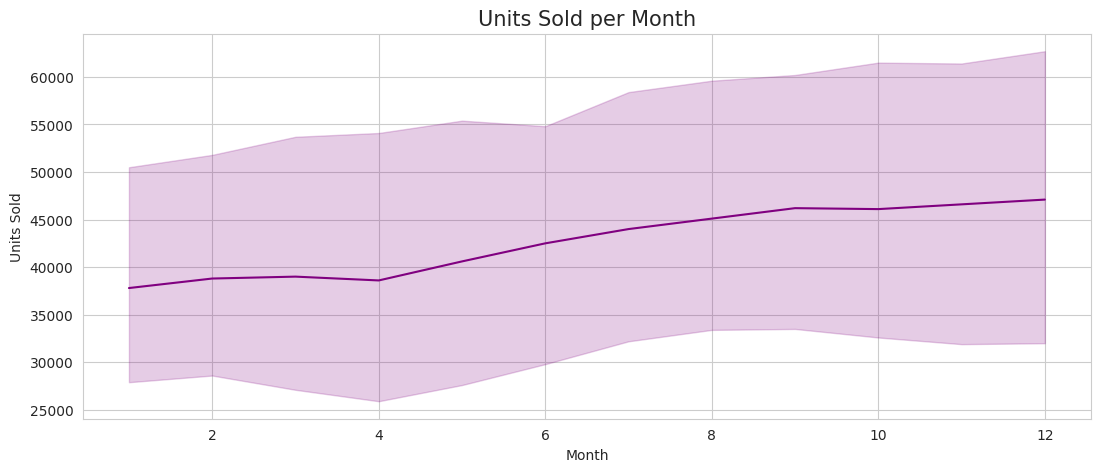

In [26]:
plt.figure(figsize=(13,5))
plt.title('Units Sold per Month', fontsize=15)
sns.lineplot(x=df['Month'],y=df['Units Sold'], color='purple')
plt.show()

In [27]:
plt.figure(figsize=(13,5))
# sns.lineplot(x=)

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>